# Assignment-1 COMP-5970 Jacob Murrah
## README
This assignment consists of two mini-projects that will test and strengthen
your understanding of photometric and geometric image transformations.
Both are designed to be fun, puzzle-like challenges that require you to use
the core operations covered in Lectures 4 and 5, from grayscale and gamma
correction to rotation and flipping.

## Dependencies
- **Python 3.x**
- **numpy**
- **matplotlib**
- **opencv-python**
- **ipython**
- **scikit-image**

*Note: If you are running this notebook in Google Colab, all the required packages are pre-installed.*

## Instructions
1. **Run All Cells:** Please click on \"Runtime\" > \"Run all\" to execute the entire notebook sequentially.
2. **Review the Outputs:** The notebook is organized into several sections. Ensure that all cells run without errors.

## GenAI Usage Declaration
GenAI was used to explain the basics of photometric and geometric operations.

## Statement of Contribution
This was an individual project and I did everything in it.

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import io
from skimage import color as change
import cv2
from IPython.display import Image
import math

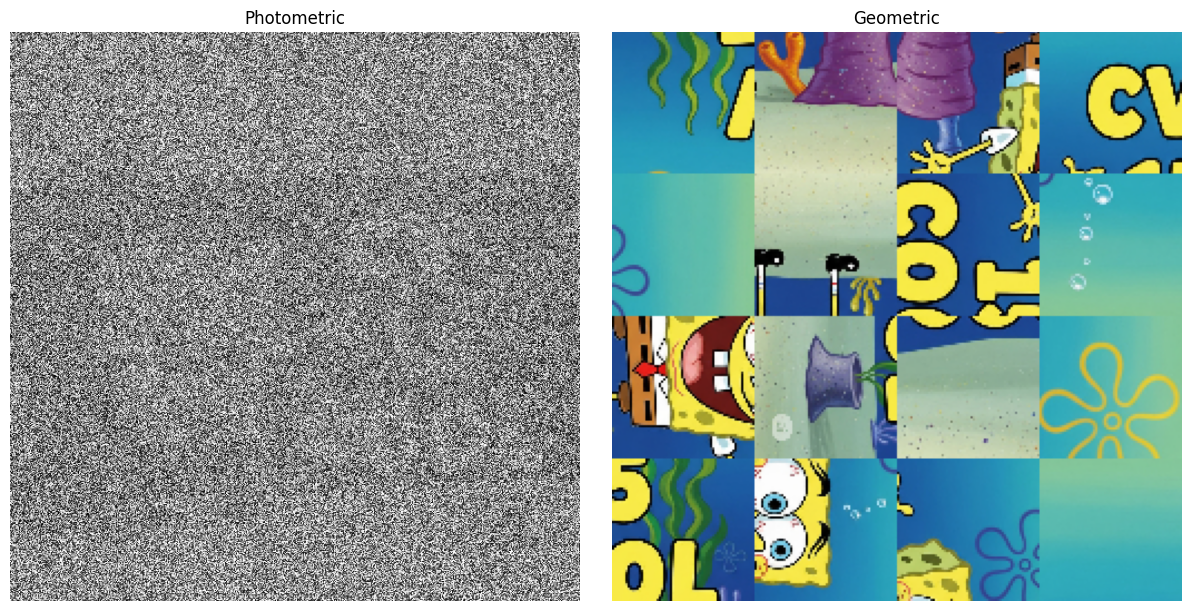

In [141]:
# Loading images
np.set_printoptions(precision=2)

photometric_img = cv2.cvtColor(
    cv2.imread('photometric_hidden_image.png'), cv2.COLOR_BGR2RGB
)
geometric_img = cv2.cvtColor(
    cv2.imread('geometric_puzzle_scrambled.png'), cv2.COLOR_BGR2RGB
)

fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)
axes[0].imshow(photometric_img)
axes[0].set_title('Photometric')
axes[0].axis('off')
axes[1].imshow(geometric_img)
axes[1].set_title('Geometric')
axes[1].axis('off')
plt.show()

# PART 1) Photometric Decoder
A hidden message is embedded inside a regular-looking image using
brightness, contrast, grayscale conversion, and gamma correction.

## Description of Approach
The initial image is very pixelated with no clear message. My first step is to see if any of the basic photometric operations make the message more clear than the original image. After testing grayscale, contrast stretching, isolating color channels, and gamma correction I found that only gamma correction showed a message with any type of clarity. I then tested different brightnesses and applying unsharp masking on the light channel of the gamma corrected. These additional operations make the hidden message even clearer.

In [142]:
# Photometric operations
def grayscale_average(img):
    return np.mean(img, axis=2).astype(np.uint8)

def grayscale_weighted(img):
    weights = [0.2125, 0.7154, 0.0721]
    return np.dot(img, weights).astype(np.uint8)

def adjust_brightness(img, brightness):
    input_img = img.astype(np.float32)/255.
    out_img = input_img + brightness
    out_img = np.where(out_img > 1, 1, out_img)
    out_img = np.where(out_img < 0, 0, out_img)
    return (out_img)*255


def adjust_contrast(img, alpha):
    return np.clip(alpha * img, 0, 255).astype(np.uint8)

def contrast_stretching(img):
    min_val = np.min(img)
    max_val = np.max(img)
    if max_val == min_val:
        return img
    stretched = (img - min_val) * (255 / (max_val - min_val))
    return stretched.astype(np.uint8)

def gamma_correction(img, gamma):
    return (np.power(img, 1/gamma))

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

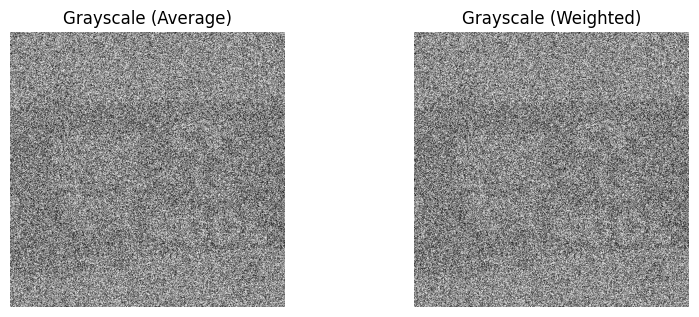

In [143]:
# testing grayscale
gray_avg = grayscale_average(photometric_img)
gray_weighted = grayscale_weighted(photometric_img)

plt.figure(figsize=(20, 25))
plt.subplot(6, 4, 1)
plt.imshow(gray_avg, cmap='gray')
plt.title('Grayscale (Average)')
plt.axis('off')

plt.subplot(6, 4, 2)
plt.imshow(gray_weighted, cmap='gray')
plt.title('Grayscale (Weighted)')
plt.axis('off')

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

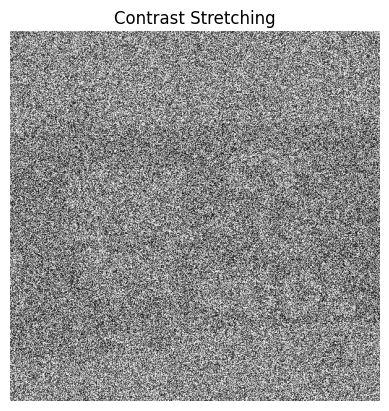

In [144]:
# testing contrast stretching
constrast_stretched_img = contrast_stretching(photometric_img)
plt.imshow(constrast_stretched_img, cmap='gray')
plt.title('Contrast Stretching')
plt.axis('off')

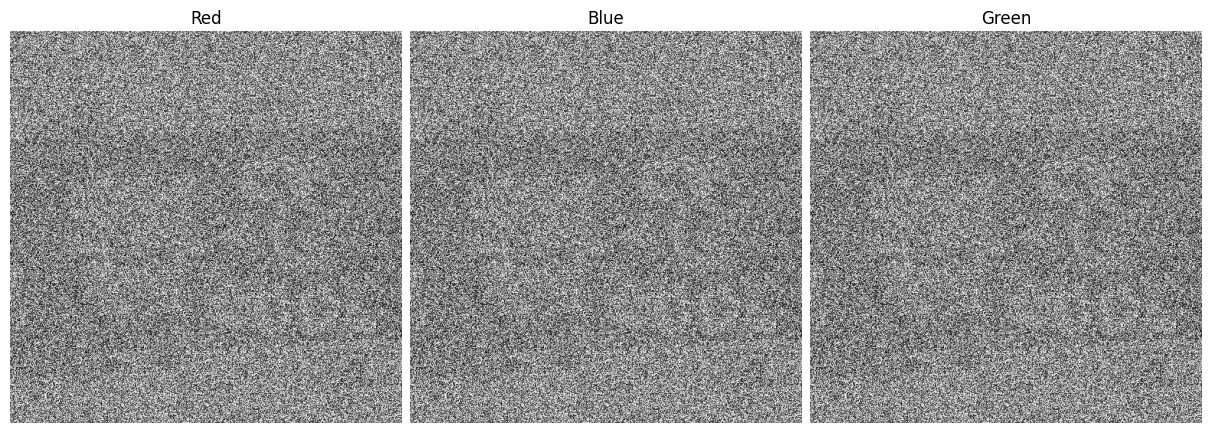

In [145]:
# testing different color channels
r_img = photometric_img[:,:,0]
b_img = photometric_img[:,:,1]
g_img = photometric_img[:,:,2]

fig, axes = plt.subplots(1, 3, figsize=(12, 6), constrained_layout=True)
axes[0].imshow(r_img, cmap='gray')
axes[0].set_title('Red')
axes[0].axis('off')
axes[1].imshow(b_img, cmap='gray')
axes[1].set_title('Blue')
axes[1].axis('off')
axes[2].imshow(g_img, cmap='gray')
axes[2].set_title('Green')
axes[2].axis('off')
plt.show()

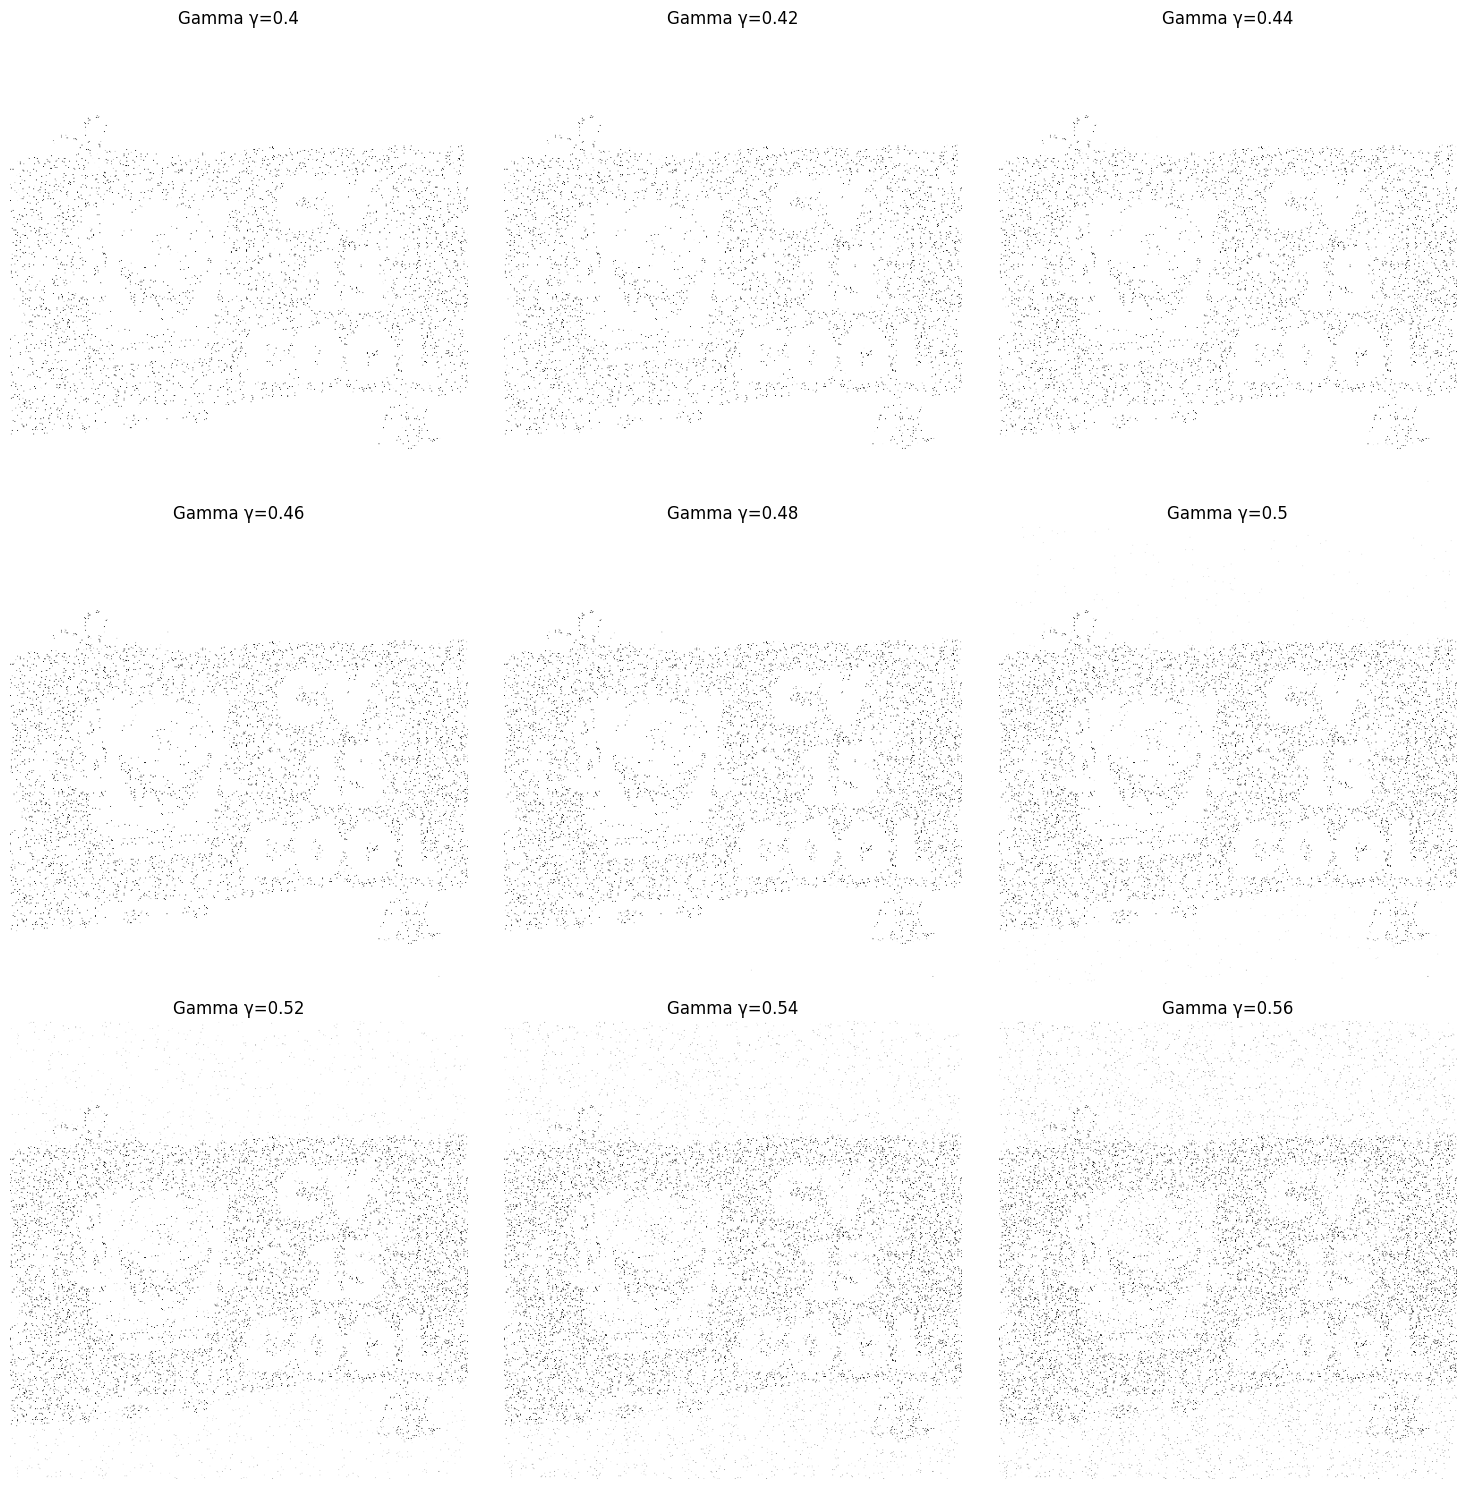

In [146]:
# testing different gamma corrections
gamma_vals = [0.40, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56]
imgs = [gamma_correction(gray_weighted, g) for g in gamma_vals]

cols = 3
rows = math.ceil(len(imgs) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*5))
axes = np.atleast_1d(axes).ravel()
for ax, g, img in zip(axes, gamma_vals, imgs):
    ax.imshow(img, cmap='gray', vmin=0, vmax=255)
    ax.set_title(f'Gamma γ={g}')
    ax.axis('off')

plt.tight_layout()
plt.show()

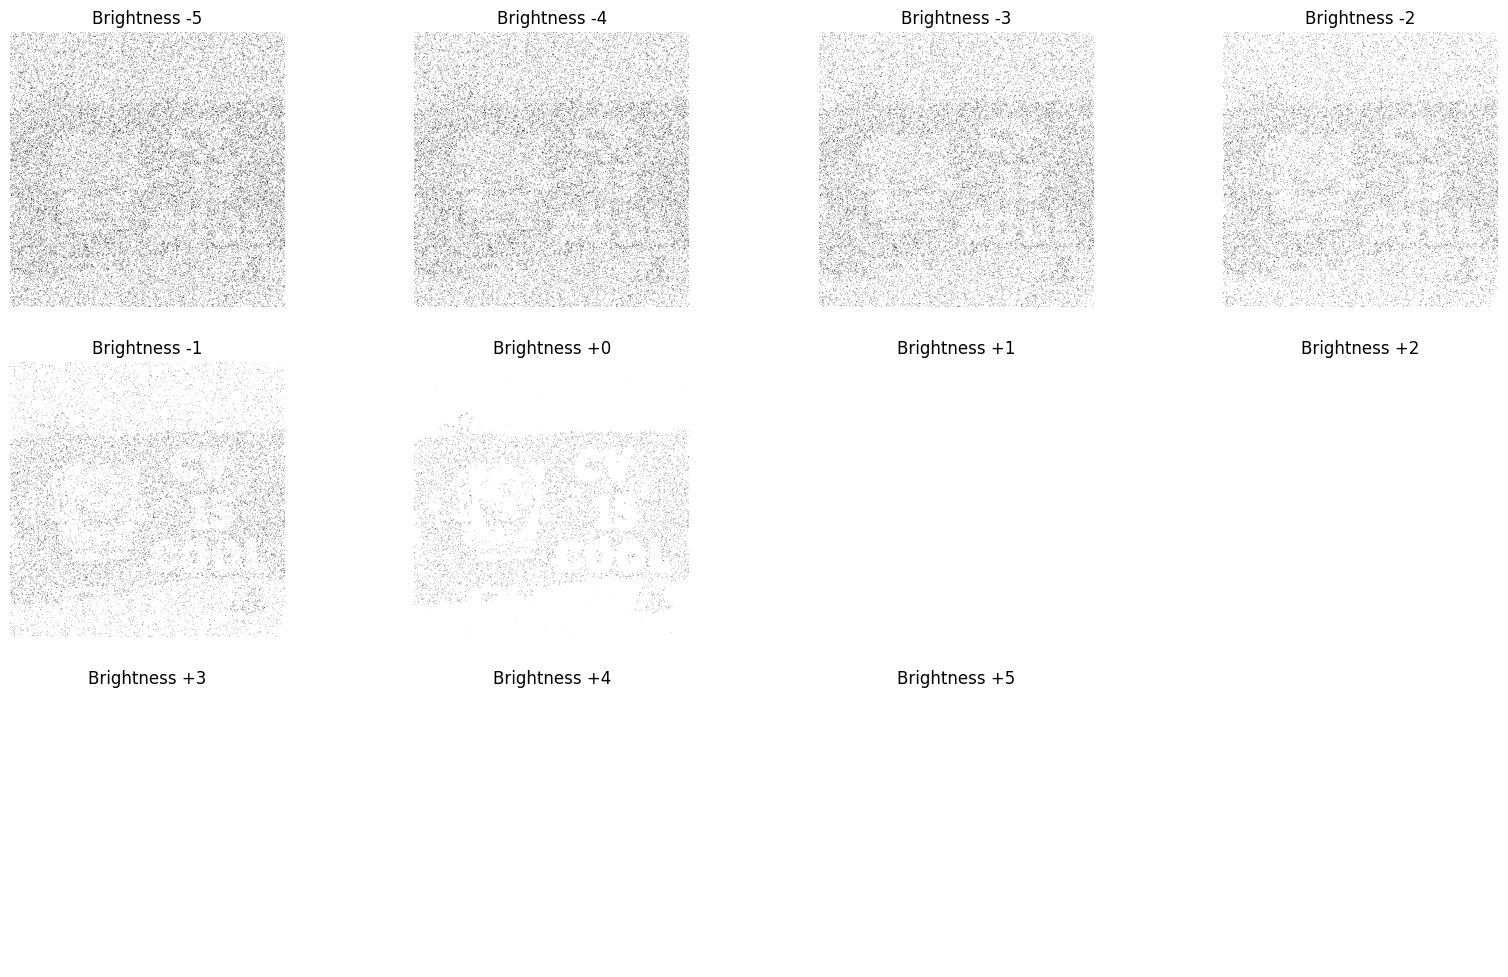

In [147]:
# testing different brightnesses on gamma image
gamma_img = gamma_correction(gray_weighted, 0.5)

brightness_vals = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
plt.figure(figsize=(20, 25))
for i, brightness in enumerate(brightness_vals):
    bright_img = adjust_brightness(gamma_img, brightness)
    plt.subplot(6, 4, i + 1)
    plt.imshow(bright_img, cmap='gray', vmin=0, vmax=255)
    plt.title(f'Brightness {brightness:+d}')
    plt.axis('off')

plt.show()

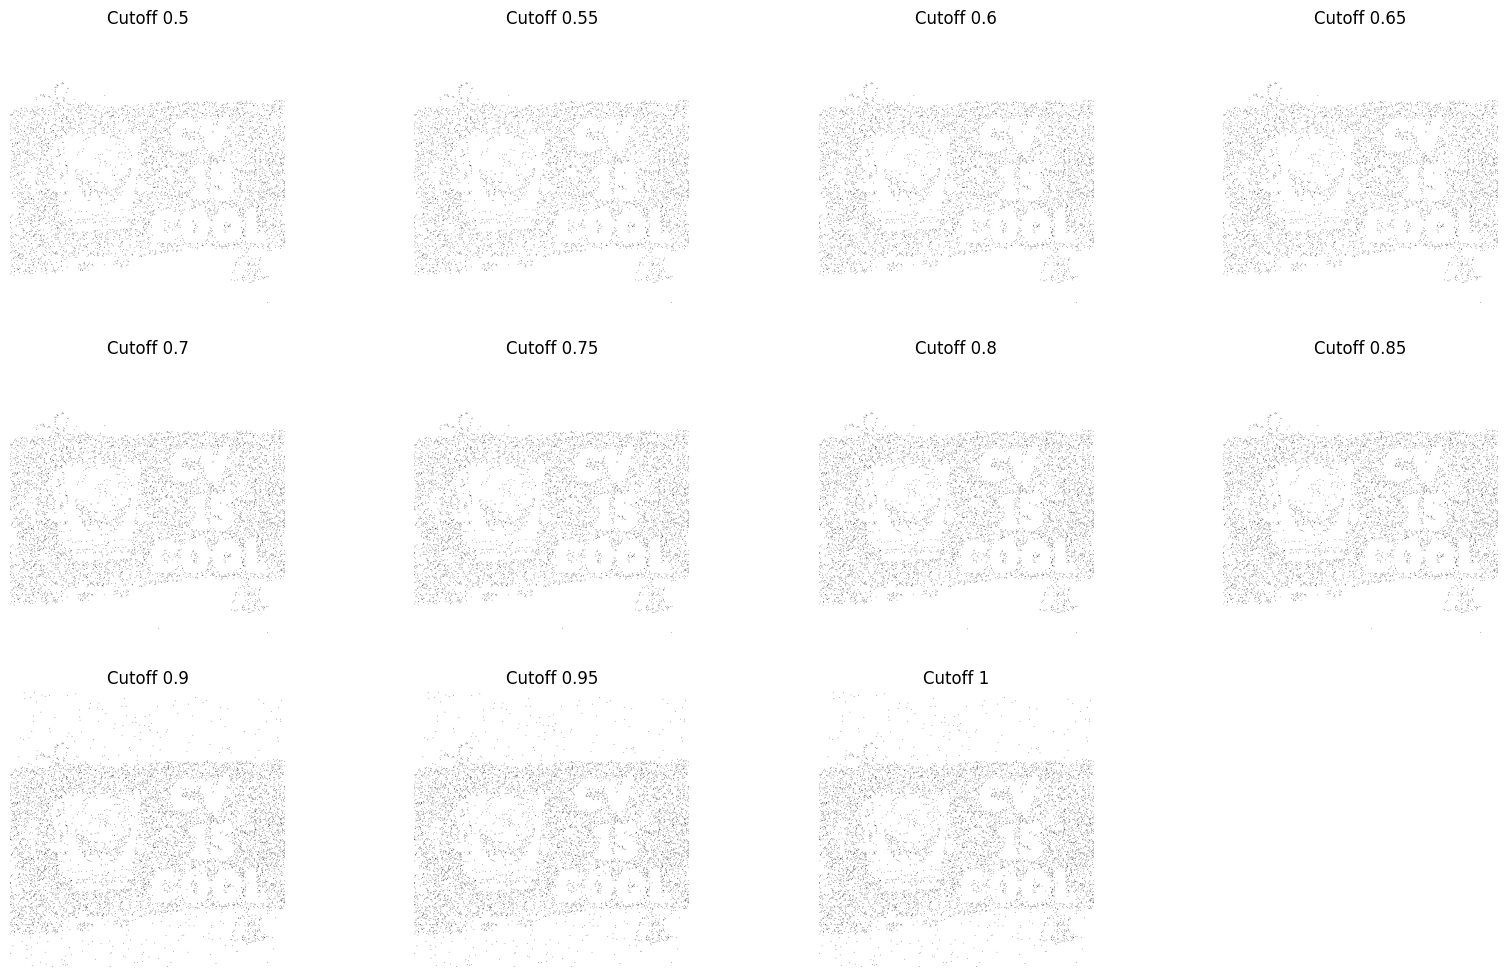

In [148]:
# testing different binary clippings on gamma image
gamma_img = gamma_correction(gray_weighted, 0.5)
cutoff_vals = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
plt.figure(figsize=(20, 25))
for i, cutoff in enumerate(cutoff_vals):
    binary_img = np.where(gamma_img/255. > cutoff, 1, 0)
    plt.subplot(6, 4, i + 1)
    plt.imshow(binary_img, cmap='gray')
    plt.title(f'Cutoff {cutoff}')
    plt.axis('off')

plt.show()

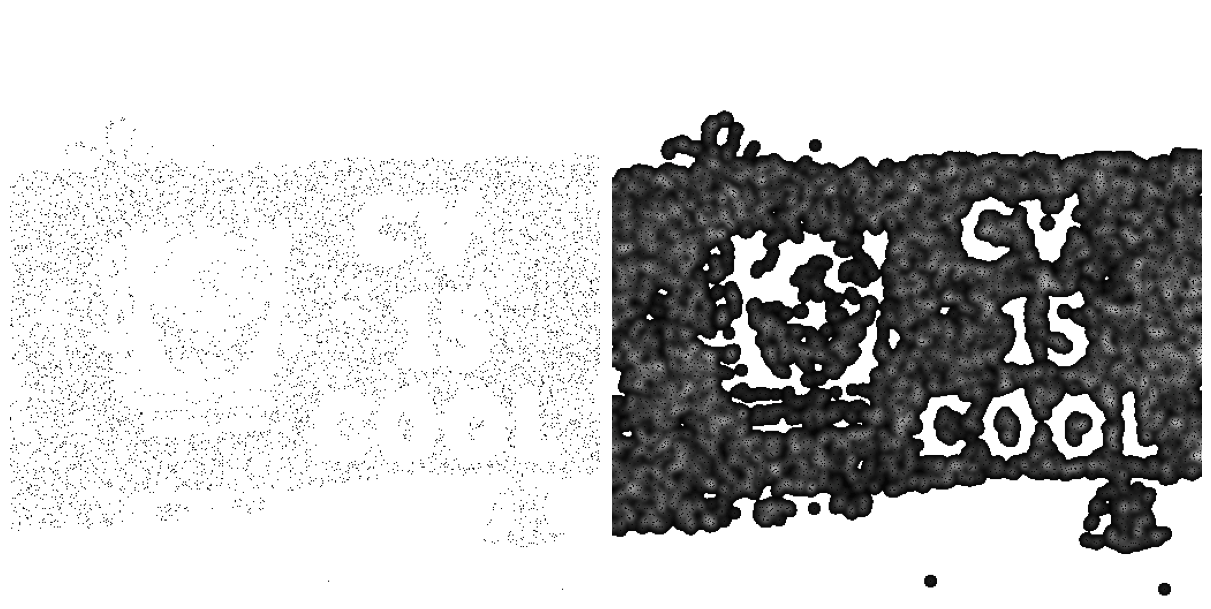

In [149]:
# testing unsharp masking on the light channel
def unsharp_L(img, radius=1.2, amount=1.5):
    x = np.stack([np.asarray(img)]*3, axis=-1).astype(np.float32)
    x = np.clip((x * 255.0).round(), 0, 255).astype(np.uint8)
    lab = cv2.cvtColor(
        np.clip((x * 255.0).round(), 0, 255).astype(np.uint8), cv2.COLOR_RGB2LAB
    )
    L, a, b = cv2.split(lab)
    blur = cv2.GaussianBlur(L, ksize=(0,0), sigmaX=radius, sigmaY=radius)
    high = cv2.subtract(L, blur)
    L_sharp = np.clip(L + amount * high, 0, 255).astype(np.uint8)
    return cv2.cvtColor(cv2.merge([L_sharp, a, b]), cv2.COLOR_LAB2RGB)

gamma_img = gamma_correction(gray_weighted, 0.5)
gamma_cut_img = np.where(gamma_img/255. > 0.85, 1, 0)
unsharp = unsharp_L(gamma_cut_img, radius=2.6, amount=5)

fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)
axes[0].imshow(gamma_cut_img, cmap='gray')
axes[0].axis('off')
axes[1].imshow(unsharp)
axes[1].axis('off')
plt.show()

# The hidden message is: "CV 15 COOL"

# PART 2) Geometric Puzzle Solver
You are given a scrambled image composed of 16 tiles that have been:
* Randomly flipped (by 90 or 180)
* Rotated (vertically or horizontally)
* Or left as is

Reconstruct the correct (original) image

## Description of Approach
Looking at the scrambled image I recognized the SpongeBob character and message from part 1 so I understood what the final image would look like. I was told that there are 16 distinct tiles that make up the full image so the first thing I need to do is determine the final position that each tile should be placed in. Once I have all the tiles in the correct final position I simple rotate and flip each tile into their final correct orientations.

<Figure size 640x480 with 0 Axes>

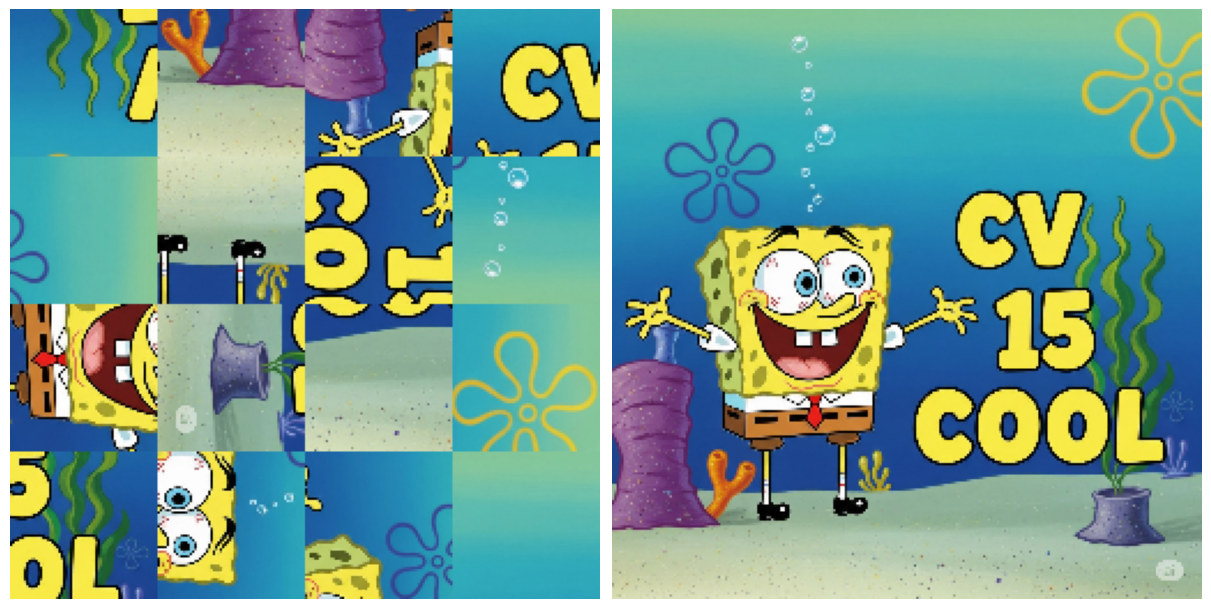

In [150]:
# geometric_img (256 x 256 image)
directions = {
    -90: cv2.ROTATE_90_COUNTERCLOCKWISE,
    90: cv2.ROTATE_90_CLOCKWISE,
    180: cv2.ROTATE_180
}

final_positions = {
    (0, 0): (1, 3),
    (0, 1): (3, 0),
    (0, 2): (2, 0),
    (0, 3): (1, 2),
    (1, 0): (0, 0),
    (1, 1): (3, 1),
    (1, 2): (2, 2),
    (1, 3): (0, 1),
    (2, 0): (2, 1),
    (2, 1): (3, 3),
    (2, 2): (3, 2),
    (2, 3): (0, 3),
    (3, 0): (2, 3),
    (3, 1): (1, 1),
    (3, 2): (1, 0),
    (3, 3): (0, 2),
}
rotations = [
    [180, 0, 180, 0],
    [-90, 180, -90, 180],
    [-90, -90, 0, -90],
    [0, -90, -90, 0],
]
horizontal_flips = [
    [0, 1, 1, 0],
    [0, 1, 0, 1],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
]

final_img = np.zeros_like(geometric_img)
plt.figure()
for i, tile_row_start in enumerate(range(0, 256, 64)):
    for j, tile_col_start in enumerate(range(0, 256, 64)):
        img = geometric_img[
            tile_row_start:tile_row_start+64, tile_col_start:tile_col_start+64, :
        ]

        degree = rotations[i][j]
        hori_flip = horizontal_flips[i][j]
        if degree:
            img = cv2.rotate(img, directions[degree])
        if hori_flip:
            img = cv2.flip(img, 1)

        final_row, final_col = final_positions[(i, j)]
        final_tile_row_start = final_row * 64
        final_tile_col_start = final_col * 64

        final_img[
            final_tile_row_start:final_tile_row_start+64,
            final_tile_col_start:final_tile_col_start+64,
            :
        ] = img


fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)
axes[0].imshow(geometric_img)
axes[0].axis('off')
axes[1].imshow(final_img)
axes[1].axis('off')
plt.show()